<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [21]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [22]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
CPI.shape, df.shape

((758, 3), (759, 104))

In [24]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [25]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [26]:
df = df.drop([758], axis = 0).reset_index(drop = True)
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [27]:
CPI = CPI.drop(columns = ["CPIAUCSL"], axis = 1)
CPI.head()

,sasdate,CPIAUCSL_diff
0,1959-03-01,-0.000691
1,1959-04-01,0.001381
2,1959-05-01,0.001721
3,1959-06-01,0.000339
4,1959-07-01,-0.001032


In [28]:
df = df.drop(columns = "sasdate", axis = 1)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [29]:
CPI.shape, df.shape

((758, 2), (758, 103))

In [30]:
CPI_data = CPI.merge(df, left_index = True, right_index = True, how = "left")
CPI_data.head()

,sasdate,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-04-01,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-05-01,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-06-01,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560

Tudo ok.

In [31]:
CPI_data.shape

(758, 105)

In [32]:
CPI_data = CPI_data.drop(columns = "sasdate", axis = 1)
CPI_data.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0

In [33]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for col in CPI_data.columns:
  for i in lags:
    CPI_data[col + "_lag_" + str(i)] = CPI_data[col].shift(i)

CPI_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


(758, 1248)

In [34]:
CPI_data = CPI_data.dropna()
CPI_data.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [35]:
CPI_data.shape

(747, 1248)

In [36]:
CPI_data = CPI_data.reset_index(drop = True)

In [37]:
CPI_data.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUELS_lag_5,IPFUELS_lag_6,IPFUELS_lag_7,IPFUELS_lag_8,IPFUELS_lag_9,IPFUELS_lag_10,IPFUELS_lag_11,CUMFNS_lag_1,CUMFNS_lag_2,CUMFNS_lag_3,CUMFNS_lag_4,CUMFNS_lag_5,CUMFNS_lag_6,CUMFNS_lag_7,CUMFNS_lag_8,CUMFNS_lag_9,CUMFNS_lag_10,CUMFNS_lag_11,CLF16OV_lag_1,CLF16OV_lag_2

In [38]:
X = CPI_data.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  model = RandomForestRegressor(n_estimators = 100, oob_score = True)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #Features importances
  features_importances = model.feature_importances_
  importance_agg.append(features_importances[0])
  print('predicted=%f, observed=%f, window=%f' % (yhat, obs[0], (len(history)-1)))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

predicted=-0.001655, observed=-0.003422, window=492.000000
predicted=0.000129, observed=-0.001705, window=492.000000
predicted=0.001830, observed=0.001133, window=492.000000
predicted=0.000934, observed=0.003375, window=492.000000
predicted=-0.001679, observed=-0.002825, window=492.000000
predicted=0.000418, observed=-0.003942, window=492.000000
predicted=0.000116, observed=0.001691, window=492.000000
predicted=0.000150, observed=0.003930, window=492.000000
predicted=-0.001003, observed=-0.006746, window=492.000000
predicted=-0.000266, observed=0.002252, window=492.000000
predicted=0.000022, observed=-0.000000, window=492.000000
predicted=0.001091, observed=0.002252, window=492.000000
predicted=-0.000271, observed=-0.000003, window=492.000000
predicted=0.000395, observed=0.001116, window=492.000000
predicted=-0.000145, observed=0.001661, window=492.000000
predicted=-0.000713, observed=-0.003348, window=492.000000
predicted=0.000569, observed=-0.000557, window=492.000000
predicted=0.000

In [39]:
len(predictions), len(observed), len(train), len(test)

(255, 255, 492, 255)

In [40]:
date = CPI["sasdate"].copy()
date.head()

0    1959-03-01
1    1959-04-01
2    1959-05-01
3    1959-06-01
4    1959-07-01
Name: sasdate, dtype: object

In [41]:
date = date[503: len(date)]
date = date.reset_index(drop= True)
date.head()

0    2001-02-01
1    2001-03-01
2    2001-04-01
3    2001-05-01
4    2001-06-01
Name: sasdate, dtype: object

In [42]:
date = pd.DataFrame(date)

In [43]:
import matplotlib.pyplot as plt

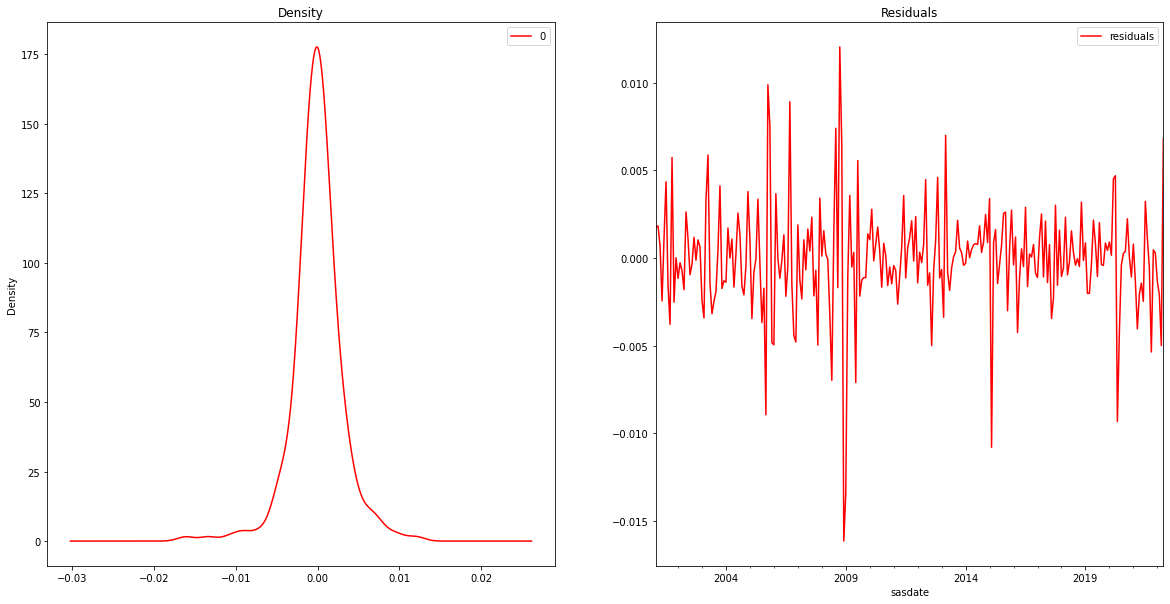

In [44]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

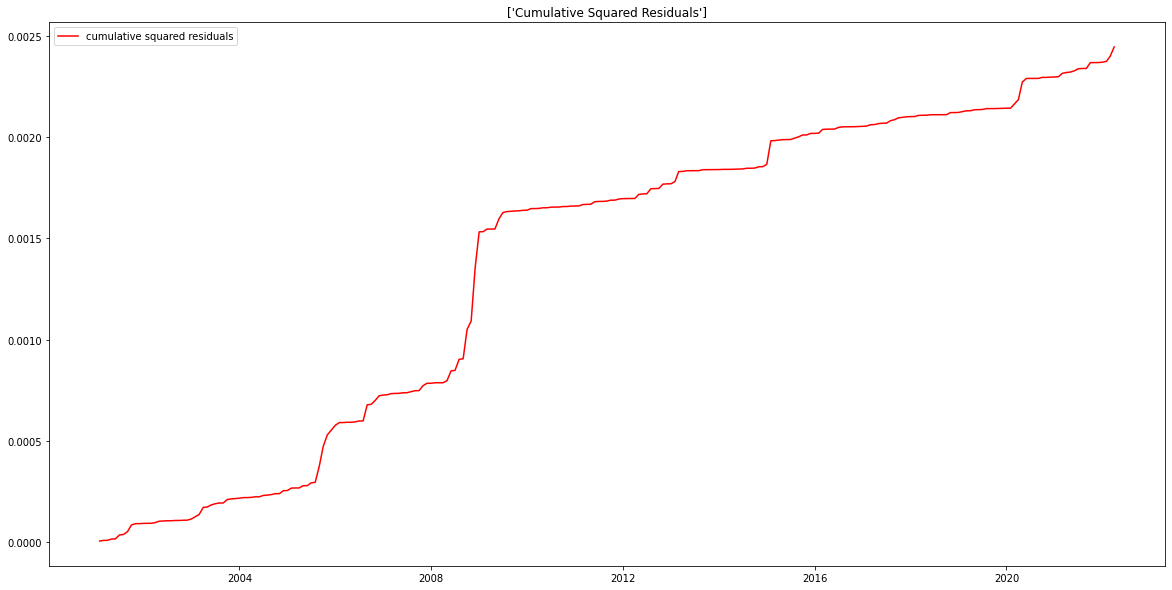

In [45]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [46]:
pred = pd.DataFrame(predictions)
observedd = pd.DataFrame(observed)

In [47]:
pred.shape, observedd.shape, date.shape

((255, 1), (255, 1), (255, 1))

In [48]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [49]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])

In [50]:
df.head()

,0_x,0_y
sasdate,,
2001-02-01,-0.001655,-0.003422
2001-03-01,0.000129,-0.001705
2001-04-01,0.001830,0.001133
2001-05-01,0.000934,0.003375
2001-06-01,-0.001679,-0.002825


In [51]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-02-01,-0.001655,-0.003422
2001-03-01,0.000129,-0.001705
2001-04-01,0.001830,0.001133
2001-05-01,0.000934,0.003375
2001-06-01,-0.001679,-0.002825


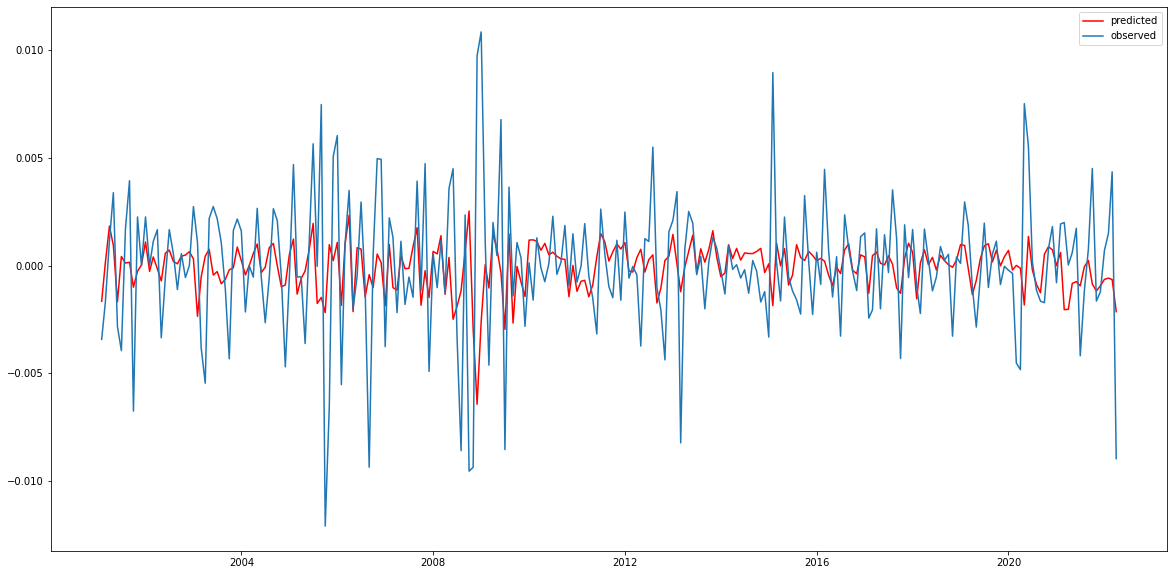

In [52]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

In [54]:
mse = mean_squared_error(observed, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(observed, predictions)
print('%f' % mse), print('%f' % mae), print('%f' % rmse)

0.000010
0.002055
0.003098


(None, None, None)